In [2]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import pandas as pd
import requests
import math
import csv
import os

In [3]:
# https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series.csv

In [4]:
os.getcwd()

'/Users/anathayna/Downloads/jupyter-notebook/edo'

In [5]:
df = pd.read_csv('/Users/anathayna/Downloads/jupyter-notebook/edo/data/time_series_covid19_confirmed_global.csv')
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,773,782,789,795,803,820,832,842,850,856
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,745,745,747,748,750,751,751,752,752,754
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,27,30,35,35,35,36,36,36,43,43


In [6]:
def getData(url):
    r = requests.get(url)
    
    with open("time_series_covid19_confirmed_global.csv",'wb') as f: 
        f.write(r.content) 

    dates = []
    cases = []

    with open('time_series_covid19_confirmed_global.csv', newline='') as csvfile:
        readCSV = csv.reader(csvfile, quotechar='|')
      
        for row in readCSV:
            if (row[1] == 'Country/Region'):
                for objc in row:
                    dates.append(objc) 
                         
            if (row[1] == 'Brazil'):
                for objc in row:
                    cases.append(objc)
        
        for _ in range(0, 4):
            dates.pop(0)
            cases.pop(0)
        
        actualRate = ((int(cases[len(cases)-1]) - int(cases[len(cases)-2])) / int(cases[len(cases)-2]))
        print(int(cases[len(cases)-1]))
        
        return [dates, cases, actualRate]

In [7]:
def getConfirmedRate():
    url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
    return getData(url)

In [8]:
def getDeathRate():
    url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
    return getData(url)

In [9]:
def getRecoveredRate():
    url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
    return getData(url)

In [10]:
def kUm1(alpha, n):
    return -alpha*n

def kUm2(alpha, beta, gama, n, c):
    return alpha*n-beta*c-gama*c

def kUm3(beta, c):
    return beta*c

def kUm4(gama, c):
    return gama*c

In [11]:
def kDois1(alpha, n, k1):
    return -alpha*(n+k1/2)

def kDois2(alpha, beta, gama, n, c, k1):
    return alpha*(n+k1/2)-beta*(c+k1/2)-gama*(c+k1/2)

def kDois3(beta, c, k1):
    return beta*(c+k1/2)

def kDois4(gama, c, k1):
    return gama*(c+k1/2)

In [12]:
def kTres1(alpha, n, k2):
    return -alpha*(n+k2/2)

def kTres2(alpha, beta, gama, n, c, k2):
    return alpha*(n+k2/2)-beta*(c+k2/2)-gama*(c+k2/2)

def kTres3(beta, c, k2):
    return beta*(c+k2/2)

def kTres4(gama, c, k2):
    return gama*(c+k2/2)

In [13]:
def kQuatro1(alpha, n, k3):
    return -alpha*(n+k3)

def kQuatro2(alpha, beta, gama, n, c, k3):
    return alpha*(n+k3)-beta*(c+k3)-gama*(c+k3)

def kQuatro3(beta, c, k3):
    return beta*(c+k3)

def kQuatro4(gama, c, k3):
    return gama*(c+k3)

In [14]:
def integrateEDO():
    
    n = 500000
    c = 0
    m = 0
    r = 0
    t = 0
    h = 1
    
    tArray = [0]
    nArray = [n]
    cArray = [c]
    mArray = [m]
    rArray = [r]
    
    confirmed = getConfirmedRate()
    death = getDeathRate()
    recovered = getRecoveredRate()
    
    alpha = confirmed[2]
    print(alpha)
    beta = recovered[2]
    gama = death[2]

    while t < 100:

        k11 = h*kUm1(alpha, n)
        k21 = h*kUm2(alpha, beta, gama, n, c)
        k31 = h*kUm3(beta, c)
        k41 = h*kUm4(gama, c)
        
        k12 = h*kDois1(alpha, n, k11)
        k22 = h*kDois2(alpha, beta, gama, n, c, k21)
        k32 = h*kDois3(beta, c, k31)
        k42 = h*kDois4(gama, c, k41)
        
        k13 = h*kTres1(alpha, n, k12)
        k23 = h*kTres2(alpha, beta, gama, n, c, k22)
        k33 = h*kTres3(beta, c, k32)
        k43 = h*kTres4(gama, c, k42)
        
        k14 = h*kQuatro1(alpha, n, k13)
        k24 = h*kQuatro2(alpha, beta, gama, n, c, k23)
        k34 = h*kQuatro3(beta, c, k33)
        k44 = h*kQuatro4(gama, c, k43)
        
        n = n+(k11+2*k12+2*k13+k14) / 6
        c = c+(k21+2*k22+2*k23+k24) / 6
        r = r+(k31+2*k32+2*k33+k34) / 6
        m = m+(k41+2*k42+2*k43+k44) / 6
        
        tArray.append(t)
        nArray.append(n)
        cArray.append(c)
        rArray.append(r)
        mArray.append(m)
        
        t = t+h
        
    plt.xlabel('Tempo /dias')
    plt.ylabel('Indivíduos')
    plt.plot(tArray, nArray, 'b', label='Suscetíveis')
    plt.plot(tArray, cArray, 'r', label='Infectados')
    plt.plot(tArray, rArray, 'g', label='Recuperados')
    plt.plot(tArray, mArray, 'k', label='Mortalidade')

    plt.legend()
    plt.show()

169594
11653
67384
0.04237887141285441


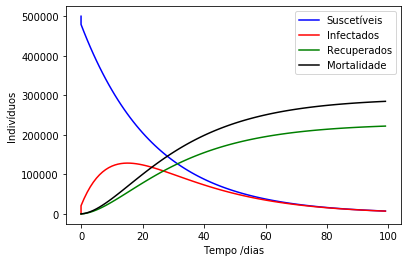

In [15]:
integrateEDO()